# Tables

UC Berkeley has its own brand of Python called the [datascience library](http://datascience.readthedocs.io/en/v0.8.1/). This additional Python software library allows you to efficiently create, import, manipulate data in tabular form and then plot it. 

Since table and plotting functionalities do not exist within the base Python installation, we must import the `datascience` (for tables) and `matplotlib` (for plotting) add-on libraries. 

In [136]:
# !pip install datascience
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('grayscale')

Begin by defining a variable named `book`. Just like strings and lists, Tables also have methods you can call by typing a period and then pressing your tab key to view the list that pops up. 

Place your cursor after `Table.` in the cell below and press the tab key to see the many methods available for Tables:

In [10]:
Table.

SyntaxError: invalid syntax (<ipython-input-10-db0a63c30a6f>, line 1)

Here, we call `Table().with_columns` in order to define our column names in quotation marks `" "` immediately follwed by lists in square brackets that contain the values. This is all nested inside a set of round parantheses `( )` and square brackets `[ ]`.  

Notice that we do not need to call the `print` function, but try it and see what happens!

In [11]:
book = Table().with_columns([
    "Chapter", [1,2,3,4,5,6,7,8],
    "Length", [4,13,21,44,56,36,21,12],
    "Setting", ["Paris", "Paris", "Tokyo", "Beijing", "New York", "Rome", "Paris", "Paris"]
])
print(type(book))
book

<class 'datascience.tables.Table'>


Chapter,Length,Setting
1,4,Paris
2,13,Paris
3,21,Tokyo
4,44,Beijing
5,56,New York
6,36,Rome
7,21,Paris
8,12,Paris


# Columns

Like strings and lists, we can also index values in a Table using the `.column` method:

In [12]:
# extract the first column by its index
book.column(0)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [13]:
# extract a single column by its name
book.column("Setting")

array(['Paris', 'Paris', 'Tokyo', 'Beijing', 'New York', 'Rome', 'Paris',
       'Paris'], dtype='<U8')

Or, you can simply use bracket notation:

In [14]:
book[0]

array([1, 2, 3, 4, 5, 6, 7, 8])

In [15]:
book["Length"]

array([ 4, 13, 21, 44, 56, 36, 21, 12])

Select multiple columns with `.select`

In [16]:
book.select("Chapter", "Setting")

Chapter,Setting
1,Paris
2,Paris
3,Tokyo
4,Beijing
5,New York
6,Rome
7,Paris
8,Paris


Count the number of columns with `.num_columns`

In [17]:
book.num_columns

3

# Rows

Count the number of rows with `.num_rows`

In [18]:
book.num_rows

8

Extract single rows with `.row`

In [19]:
book.row(4)

Row(Chapter=5, Length=56, Setting='New York')

`.take` will extract rows as well

In [20]:
book.take[4]

Chapter,Length,Setting
5,56,New York


`.where` will extract rows based on certain conditions. Let's select rows that are only equal to 21 pages:

In [21]:
book.where("Length", are.equal_to(21))

Chapter,Length,Setting
3,21,Tokyo
7,21,Paris


# Adding new columns

Suppose that we know there are exactly 250 words per page in our `book`. We can even add a column that multiplies the number of pages in each chapter by 250 to produce the number of words per chapter. 

Let's create a new table named `book_words` so that we do not alter our original `book` table:

In [22]:
book_words = book.with_column("Words per chapter", book["Length"] * 250)
book_words

Chapter,Length,Setting,Words per chapter
1,4,Paris,1000
2,13,Paris,3250
3,21,Tokyo,5250
4,44,Beijing,11000
5,56,New York,14000
6,36,Rome,9000
7,21,Paris,5250
8,12,Paris,3000


We can now ask questions such as:
1. How many chapters are in the book?  
2. How many pages are in the book?  
3. How many words are in the book?  

In [23]:
print("There are", book_words.num_rows, "chapters in the book.")
print("The number of pages in the book is:", sum(book_words[1]))
print(sum(book_words["Words per chapter"]), "is the number of words in the book.")

There are 8 chapters in the book.
The number of pages in the book is: 207
51750 is the number of words in the book.


# Relabeling column names

We can relabel column names using `.relabeled`

In [24]:
book_words.relabeled(["Words per chapter", "Chapter"], ["Sushi", "Pizza"])

Pizza,Length,Setting,Sushi
1,4,Paris,1000
2,13,Paris,3250
3,21,Tokyo,5250
4,44,Beijing,11000
5,56,New York,14000
6,36,Rome,9000
7,21,Paris,5250
8,12,Paris,3000


# Sorting data

Use the `.sort` method to sort your data! Include the optional argument `descenging = ` to sort it in descending or ascending order. 

In [25]:
# Hey Doug! Remember! The default sort is in ascending order! 
sorted_book = book.sort("Length", descending = True)
sorted_book

Chapter,Length,Setting
5,56,New York
4,44,Beijing
6,36,Rome
7,21,Paris
3,21,Tokyo
2,13,Paris
8,12,Paris
1,4,Paris


# Frequency tables

Use the `.group` method to create frequency tables. 

In [26]:
book.group("Setting")

Setting,count
Beijing,1
New York,1
Paris,4
Rome,1
Tokyo,1


You can also use `.pivot` to create pivot tables.

In [27]:
book_words.pivot("Setting", "Words per chapter")

Words per chapter,Beijing,New York,Paris,Rome,Tokyo
1000,0,0,1,0,0
3000,0,0,1,0,0
3250,0,0,1,0,0
5250,0,0,1,0,1
9000,0,0,0,1,0
11000,1,0,0,0,0
14000,0,1,0,0,0


# Challenge 1

1. Create a table that has 3 columns and 8 rows. 
2. Which Table methods might you use to verify that your Table has 3 columns and 8 rows?
3. What methods can you use to extract columns? To extract rows?
4. Add a new, fourth column to your table! 
5. Subset this table to include only two columns. 

In [44]:
## YOUR CODE HERE

my_table = Table().with_columns([
    "Color", ["yellow", "green", "blue", "red", "purple", "pink", "turquoise", "chartruese"],
    "Shapes", ["triangle", "circle", "square", "octagon", "star", "diamond", "heart", "rectangle"],
    "Numbers", [1,2,3,4,5,6,7,8]
])
my_table
#print(my_table.num_columns)
#print(my_table.num_rows)

Color,Shapes,Numbers
yellow,triangle,1
green,circle,2
blue,square,3
red,octagon,4
purple,star,5
pink,diamond,6
turquoise,heart,7
chartruese,rectangle,8


In [39]:
print(my_table.column(0))

['yellow' 'green' 'blue' 'red' 'purple' 'pink' 'turquoise' 'chartruese']


In [41]:
print(my_table[1])

['triangle' 'circle' 'square' 'octagon' 'star' 'diamond' 'heart'
 'rectangle']


In [43]:
print(my_table.row(0))

Row(Color='yellow', Shapes='triangle', Numbers=1)


In [52]:
my_table.with_columns([
    "Cities", ["Lansing", "Las Vegas", "Los Angeles", "Providence", "Berkeley", "Minneapolois", "St. Paul", "New York"]
])

Color,Shapes,Numbers,Cities
yellow,triangle,1,Lansing
green,circle,2,Las Vegas
blue,square,3,Los Angeles
red,octagon,4,Providence
purple,star,5,Berkeley
pink,diamond,6,Minneapolois
turquoise,heart,7,St. Paul
chartruese,rectangle,8,New York


# Visualizing your data

We will begin by using the `matplotlib` Python library to plot data from our `datascience` Tables. 

`plots.style.available` will give you a list of stock options to customize your plots. Scroll back up top to the second cell and see we are using 'seaborn-poster' due to its classic look.

In [53]:
plots.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

# Histogram

We can plot one numeric variable using a histogram to view its distribution using `.hist`

We might ask the question: what does the proportion of pages per chapter look like throughout the book?

In [54]:
book_words

Chapter,Length,Setting,Words per chapter
1,4,Paris,1000
2,13,Paris,3250
3,21,Tokyo,5250
4,44,Beijing,11000
5,56,New York,14000
6,36,Rome,9000
7,21,Paris,5250
8,12,Paris,3000


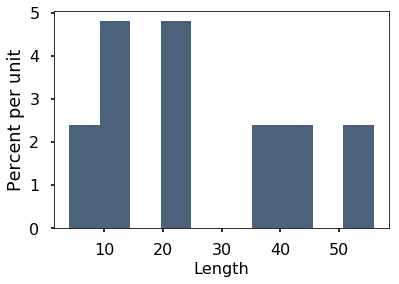

In [57]:
book_words.hist("Length")

Change the number of bins and using the `bins = range()` argument. Change the plot height and width using the `height =` and `width =` arguments:

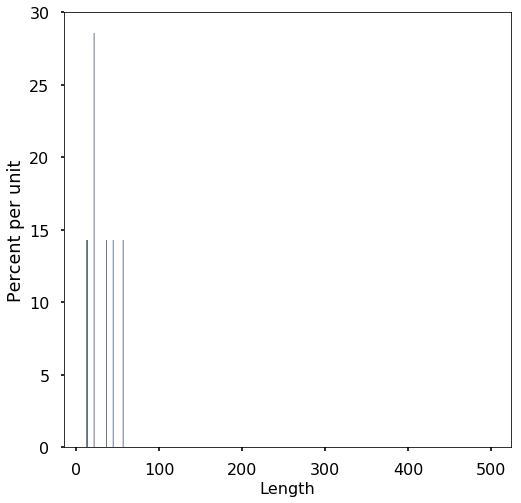

In [64]:
book.hist("Length", bins = range(10,500), height = 8, width=8)

# Bar plot

We can also use bar plots to visualize two variables using `.bar` and `.barh`

We might ask a question such as: how can we visualize the length of each chapter relative to the other chapters?

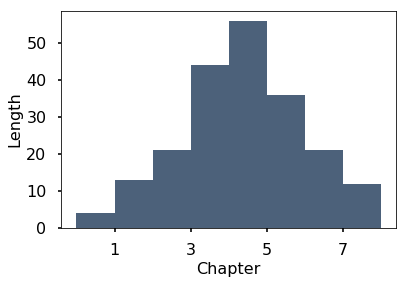

In [25]:
book_words.bar("Chapter", "Length")

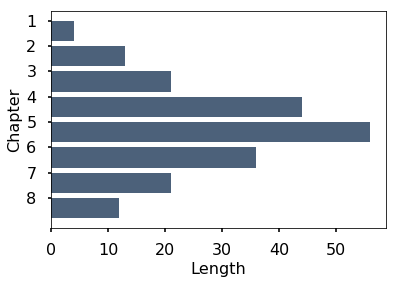

In [26]:
book.barh("Chapter", "Length")

# Scatter plot

Scatterplots are useful when we want to visualize two numeric variables. 

Ask a question such as: what is the relationship between number of pages in each chapter ("Length") and the number of words per chapter ("Words per chapter"). 

Why is this relationship positive linear? (hint: think back to the relationship of the number of words per page and chapter length!)

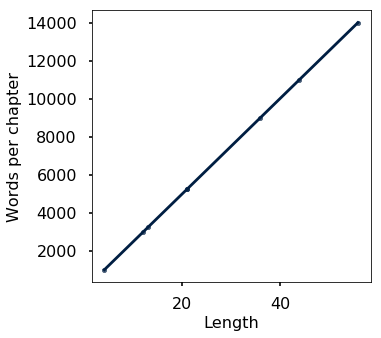

In [71]:
book_words.scatter("Length", "Words per chapter", fit_line=bool(1))

# Boxplot

Boxplots are useful when we want to visualize the distribution of a variable. 

For example, we might want to see how "Words per chapter" are distributed.

**NOTE**: look at how we are now using _two_ periods (methods) within a single line of code: 
1. `select` - to select the column we want to plot, and
2. `boxplot` - the way we want to visualize our data!

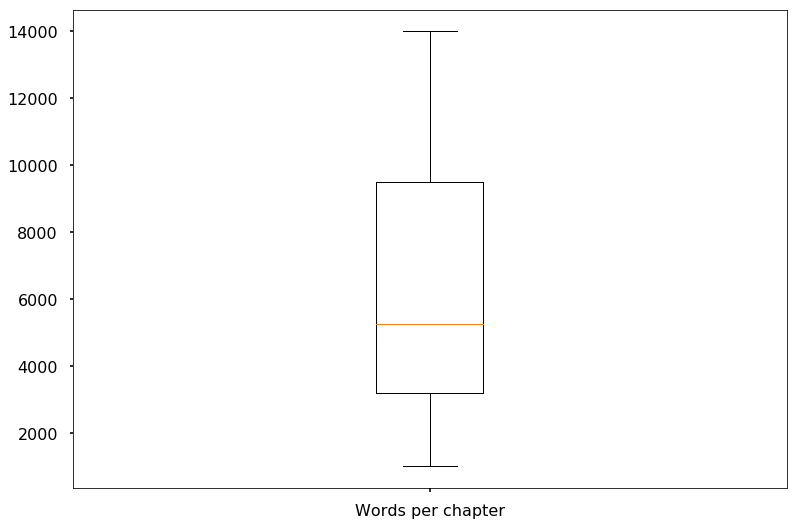

In [73]:
book_words.select("Words per chapter").boxplot()

# Line plot

Line plots can help us in cases such as looking at change over time. 

We might ask: how does the number of words per chapter change from 1-8?

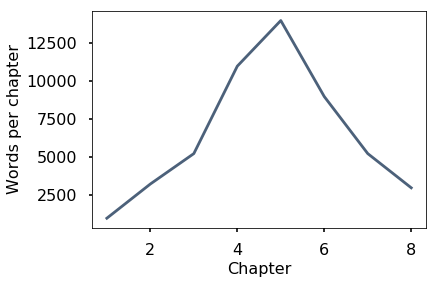

In [29]:
book_words.select("Chapter", "Words per chapter").plot("Chapter","Words per chapter")

# Importing .csv files

Comma-separated values (.csv) files are a common way to store data and they look like a basic spreadsheet. Although great for teaching exercises, in real life research we never fabricate data. 

Instead, we design collection protocols and record data in spreadsheets, but then we need a way to import it into Python so we can do the manipulations you have learned so far. 

Fortunately, `datascience` Tables have a neat `.read_table()` function that allows us to load data from files.

In [ ]:
intra-observer error # within an observer
inter-observer error # between observers

In [ ]:
comma-separated values file

In [92]:
#load the "iris" .csv file
iris = Table.read_table("iris.csv")
print(type(iris))
iris

<class 'datascience.tables.Table'>


Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


# Challenge 2

Using the iris dataset and your help files:  
1. Create a frequency table that shows how many observations (rows) there are of each species.  
2. Define a new variable called `large_petal_lengths` that are greater than or equal to 4.6.
3. Define a new variable names `setosa` that contains only setosa species from the Species column. 
4. Create a new column in `iris` named Petal_Area that contains the product of Petal_Length and Petal_Width.
5. Create overlaid histograms for "Petal_Length" for each of the three species. 
6. Make boxplots for "Petal_Length", "Petal_Width", "Sepal_Length", and "Sepal_Width" columns. 
7. Create a scatterplot of `iris` Petal_Length versus Petal_Width. Color each point of this scatterplot according to "Species".
8. What can you say about the relationship between Petal_Length and Petal_Width for the three species?

In [93]:
iris.group("Species")

Species,count
setosa,50
versicolor,50
virginica,50


In [94]:
large_petal_lengths = iris.where("Petal_Length", are.above_or_equal_to(4.6))
large_petal_lengths.num_rows

63

In [95]:
# 3. 
setosa = iris.where("Species", are.equal_to("setosa"))
setosa

Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [96]:
# 4. Create a new column in iris named Petal_Area that contains the product of Petal_Length and Petal_Width.
iris2 = iris.with_column("Petal_Area", iris["Petal_Length"] * iris["Petal_Width"])
iris2

Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,Petal_Area
5.1,3.5,1.4,0.2,setosa,0.28
4.9,3,1.4,0.2,setosa,0.28
4.7,3.2,1.3,0.2,setosa,0.26
4.6,3.1,1.5,0.2,setosa,0.3
5,3.6,1.4,0.2,setosa,0.28
5.4,3.9,1.7,0.4,setosa,0.68
4.6,3.4,1.4,0.3,setosa,0.42
5,3.4,1.5,0.2,setosa,0.3
4.4,2.9,1.4,0.2,setosa,0.28
4.9,3.1,1.5,0.1,setosa,0.15


In [97]:
iris

Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [ ]:
# 5. Create overlaid histograms for "Petal_Length" for each of the three species.


In [100]:
help(iris.hist)

Help on method hist in module datascience.tables:

hist(*columns, overlay=True, bins=None, bin_column=None, unit=None, counts=None, group=None, side_by_side=False, width=6, height=4, **vargs) method of datascience.tables.Table instance
    Plots one histogram for each column in columns. If no column is
    specified, plot all columns.
    
    Kwargs:
        overlay (bool): If True, plots 1 chart with all the histograms
            overlaid on top of each other (instead of the default behavior
            of one histogram for each column in the table). Also adds a
            legend that matches each bar color to its column.  Note that
            if the histograms are not overlaid, they are not forced to the
            same scale.
    
        bins (list or int): Lower bound for each bin in the
            histogram or number of bins. If None, bins will
            be chosen automatically.
    
        bin_column (column name or index): A column of bin lower bounds.
            All 

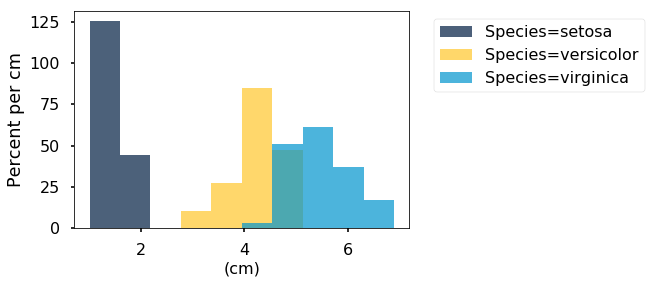

In [113]:
iris.hist("Petal_Length", group = "Species", overlay = True, unit="cm")

In [122]:
iris.select([0:3]).boxplot()

SyntaxError: invalid syntax (<ipython-input-122-e69ecd511b58>, line 1)

In [119]:
#iris.select("Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width").boxplot()
iris

Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [114]:
help(iris.boxplot)

Help on method boxplot in module datascience.tables:

boxplot(**vargs) method of datascience.tables.Table instance
    Plots a boxplot for the table.
    
    Every column must be numerical.
    
    Kwargs:
        vargs: Additional arguments that get passed into `plt.boxplot`.
            See http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot
            for additional arguments that can be passed into vargs. These include
            `vert` and `showmeans`.
    
    Returns:
        None
    
    Raises:
        ValueError: The Table contains columns with non-numerical values.
    
    >>> table = Table().with_columns(
    ...     'test1', make_array(92.5, 88, 72, 71, 99, 100, 95, 83, 94, 93),
    ...     'test2', make_array(89, 84, 74, 66, 92, 99, 88, 81, 95, 94))
    >>> table
    test1 | test2
    92.5  | 89
    88    | 84
    72    | 74
    71    | 66
    99    | 92
    100   | 99
    95    | 88
    83    | 81
    94    | 95
    93    | 94
    >>> table.boxplot(

In [ ]:
# 6. Make boxplots for "Petal_Length", "Petal_Width", "Sepal_Length", and "Sepal_Width" columns.


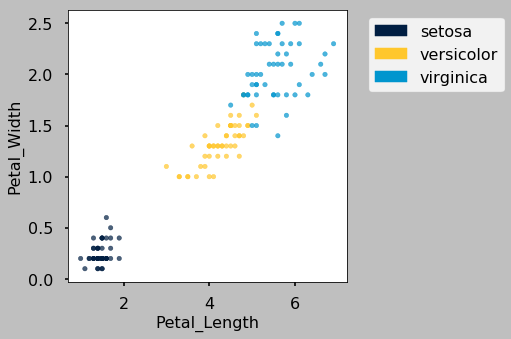

In [137]:
# 7. Create a scatterplot of iris Petal_Length versus Petal_Width. 
# Color each point of this scatterplot according to "Species".
iris.select("Petal_Length", "Petal_Width", "Species").scatter("Petal_Length", colors = "Species")

In [124]:
help(iris.scatter)

Help on method scatter in module datascience.tables:

scatter(column_for_x, select=None, overlay=True, fit_line=False, colors=None, labels=None, sizes=None, width=5, height=5, s=20, **vargs) method of datascience.tables.Table instance
    Creates scatterplots, optionally adding a line of best fit.
    
    Args:
        ``column_for_x`` (``str``): The column to use for the x-axis values
            and label of the scatter plots.
    
    Kwargs:
        ``overlay`` (``bool``): If true, creates a chart with one color
            per data column; if False, each plot will be displayed separately.
    
        ``fit_line`` (``bool``): draw a line of best fit for each set of points.
    
        ``vargs``: Additional arguments that get passed into `plt.scatter`.
            See http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
            for additional arguments that can be passed into vargs. These
            include: `marker` and `norm`, to name a couple.
    
        

In [ ]:


What can you say about the relationship between Petal_Length and Petal_Width for the three species?

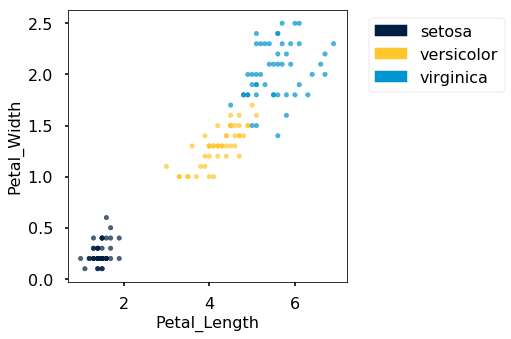

In [133]:
iris.scatter("Petal_Length", "Petal_Width", colors = "Species")

In [144]:
book_words.split(2)

(Chapter | Length | Setting | Words per chapter
 1       | 4      | Paris   | 1000
 4       | 44     | Beijing | 11000,
 Chapter | Length | Setting  | Words per chapter
 5       | 56     | New York | 14000
 3       | 21     | Tokyo    | 5250
 7       | 21     | Paris    | 5250
 2       | 13     | Paris    | 3250
 8       | 12     | Paris    | 3000
 6       | 36     | Rome     | 9000)

In [147]:
import numpy as np

In [150]:
table1 = book_words.take(np.arange(0,2))
table1

Chapter,Length,Setting,Words per chapter
1,4,Paris,1000
2,13,Paris,3250
